In [1]:
# import required liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV , cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix 

In [2]:
# Loading dataset
wine_df=pd.read_csv("C:\\Users\\skalk\\Downloads\\winequality-red.csv")
print("Dataset Shape: ",wine_df.shape)
wine_df.head()

Dataset Shape:  (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Info about data columns
wine_df.info

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

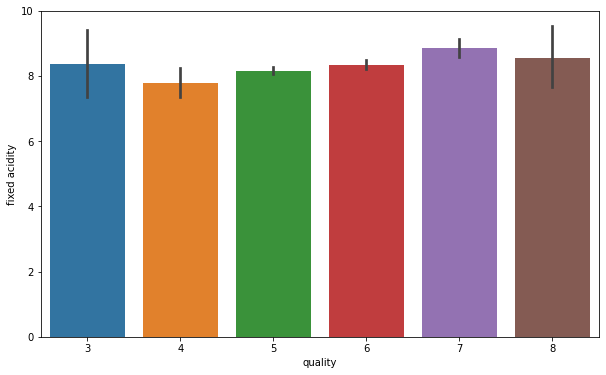

In [4]:
#plotting graphs for better insight to data distribution
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='fixed acidity', data=wine_df)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

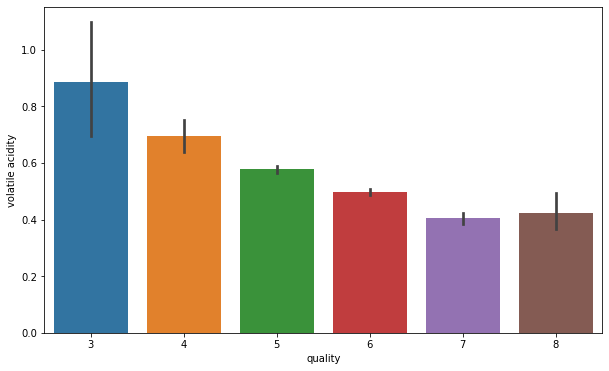

In [5]:
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='volatile acidity', data=wine_df)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

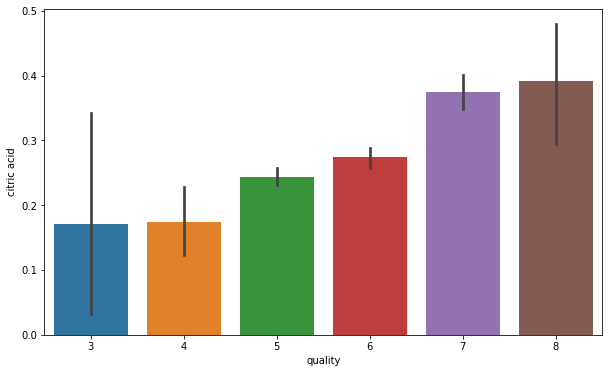

In [6]:
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='citric acid', data=wine_df)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

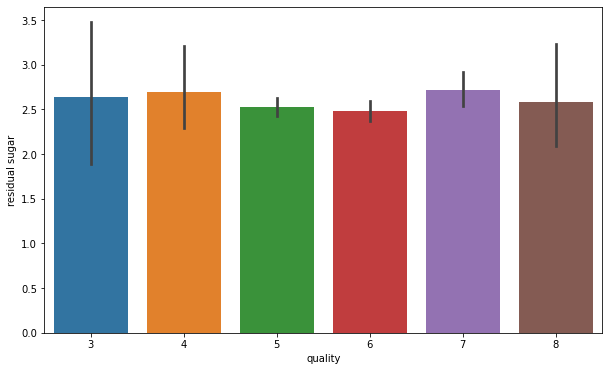

In [7]:
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='residual sugar', data=wine_df)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

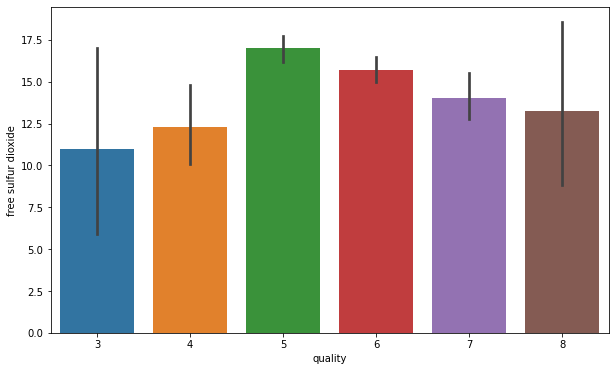

In [8]:
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='free sulfur dioxide', data=wine_df)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

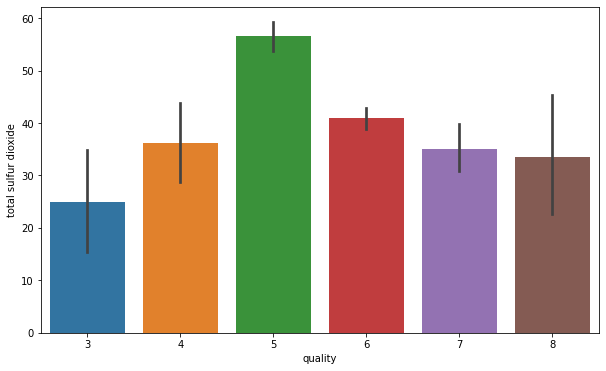

In [9]:
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='total sulfur dioxide', data=wine_df)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

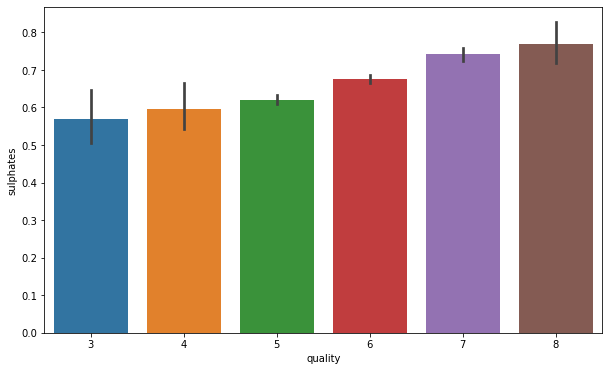

In [10]:
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='sulphates', data=wine_df)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

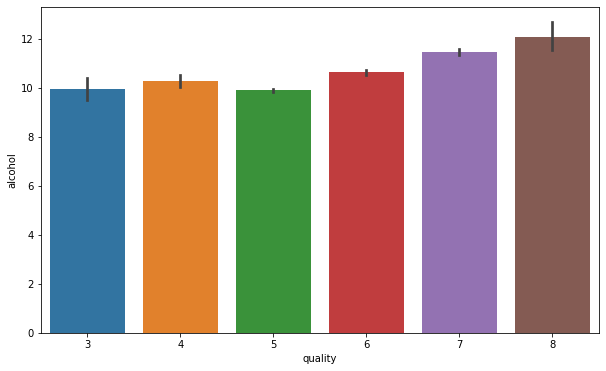

In [11]:
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='alcohol', data=wine_df)

<AxesSubplot:xlabel='quality', ylabel='pH'>

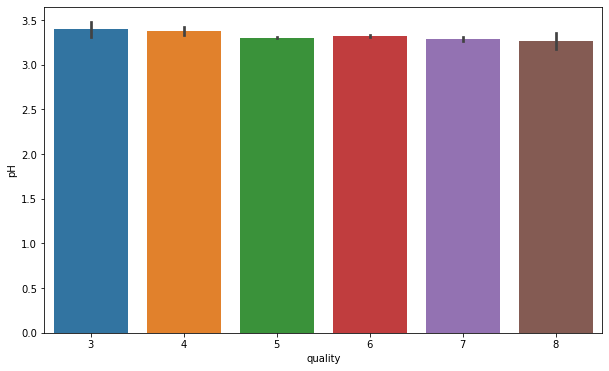

In [12]:
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='pH', data=wine_df)

In [13]:
# Preprocessing  Data for ML Algorithm
wine_df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [14]:
# classifying the wine quality as good or bad based on its quality
# "Bad" or 0 if quality of the wine lies between range (3,6)(inclusive)
# "Good" or 1 if the quality of the wine lies in the range (7,8)(inclusive)
wine_df['quality']=wine_df['quality'].apply(lambda x: 1 if x >6.5 else 0)
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


0    1382
1     217
Name: quality, dtype: int64


C:\Users\skalk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

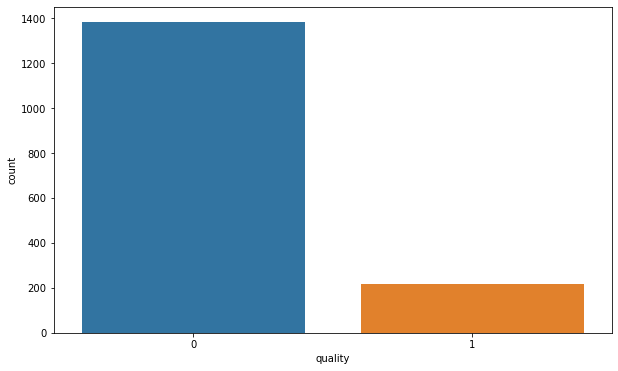

In [15]:
print(wine_df['quality'].value_counts())
fig=plt.figure(figsize=(10,6))
sns.countplot(wine_df['quality'])

In [16]:
# Separating the dependent and independent variable
x=wine_df.iloc[:, :-1].values
y=wine_df.iloc[:, -1].values


In [17]:
x

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [18]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [19]:
# splitting into train and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print("x-train shape: ",x_train.shape)
print("x-test shape: ",x_test.shape)
print("y-train shape: ",y_train.shape)
print("y-test shape: ",y_test.shape)

x-train shape:  (1279, 11)
x-test shape:  (320, 11)
y-train shape:  (1279,)
y-test shape:  (320,)


In [20]:
#CREATING MN ALGORITHM
# creating Random Forest Classifier instance
rf_regressor=RandomForestClassifier(n_estimators=100)
# fitting the classifier with training data
rf_regressor.fit(x_train,y_train)
# predicting using classifier
y_pred=rf_regressor.predict(x_test)

[[262  11]
 [ 22  25]]


<Figure size 720x432 with 0 Axes>

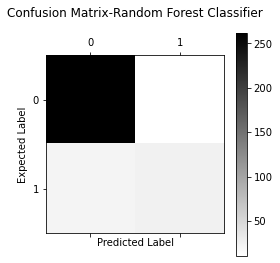

In [21]:
# confusion matrix and matplot for it
cm=confusion_matrix(y_test,y_pred)
print(cm)
fig=plt.figure(figsize=(10,6))
plt.matshow(cm,cmap=plt.cm.binary, interpolation='nearest')
plt.title("Confusion Matrix-Random Forest Classifier\n")
plt.colorbar()
plt.ylabel("Expected Label")
plt.xlabel("Predicted Label")
plt.show()

In [22]:
print("Total Predictions: ",len(y_pred))
print("Correct Prediction: ",sum(y_pred == y_test))
print("Incorrect Prediction: ",sum(y_pred!=y_test))
print("Accuracy: ",sum(y_pred==y_test)*100/len(y_pred),"%")

Total Predictions:  320
Correct Prediction:  287
Incorrect Prediction:  33
Accuracy:  89.6875 %


In [23]:
# Support vector Classifier
svc_regressor=SVC()
svc_regressor.fit(x_train,y_train)
y_pred=svc_regressor.predict(x_test)

[[273   0]
 [ 46   1]]


<Figure size 720x432 with 0 Axes>

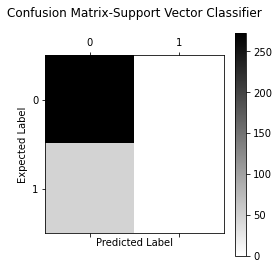

In [24]:
# confusion matrix and matplot of confusion matrix for svc
cm=confusion_matrix(y_test,y_pred)
print(cm)
fig=plt.figure(figsize=(10,6))
plt.matshow(cm,cmap=plt.cm.binary, interpolation='nearest')
plt.title("Confusion Matrix-Support Vector Classifier\n")
plt.colorbar()
plt.ylabel("Expected Label")
plt.xlabel("Predicted Label")
plt.show()

In [25]:
print("Total Predictions: ",len(y_pred))
print("Correct Prediction: ",sum(y_pred==y_test))
print("Incorrect Prediction: ",sum(y_pred != y_test))
print("Accuracy: ",sum(y_pred==y_test)*100 / len(y_pred),"%")

Total Predictions:  320
Correct Prediction:  274
Incorrect Prediction:  46
Accuracy:  85.625 %
